In [114]:
import sys
from __future__ import division

In [115]:
import numpy as np
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.sympy import *

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

In [116]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

import scipy.signal

b'2017-09-29 14:18:38 -0400 (bbb2b427cdfd3d3fc1a626fa4fa5404882cc9820)'


In [117]:
@np.vectorize
def fmt(v):
    return "{0:.2e}".format(v)
    
def matrix_markdown(mat, fmt = fmt):
    display(Markdown(
        tabulate.tabulate(
            fmt(mat),
            tablefmt='pipe',
            headers = [''] * mat.shape[0]
    )))
    return

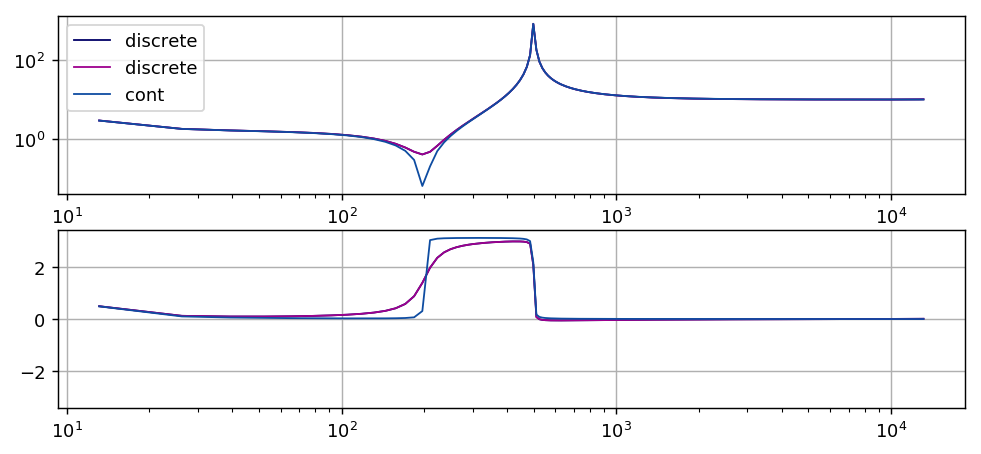

In [118]:
F_AC1 = np.linspace(0, 16384 * .8, 1000)
F_AC2 = logspaced(1, 16384 * .8, 100)
F_AC = F_AC1
#F_AC = np.concatenate([F_AC1, F_AC2])
F_AC = np.concatenate([F_AC, -F_AC])
F_AC.sort()
#F_AC = np.linspace(0, 16384 * .8, 1000)
    
ZPKs = (
    [
        2 * np.pi * (-1 + 4j), 
        2 * np.pi * (-1 - 4j),
        2 * np.pi * (-1 + 200j), 
        2 * np.pi * (-1 - 200j)
    ], 
    [
        2 * np.pi * (-2 + 10j), 
        2 * np.pi * (-2 - 10j),
        2 * np.pi * (-2 + 500j), 
        2 * np.pi * (-2 - 500j),
        #2 * np.pi * (-100 + 20j),
        #2 * np.pi * (-100 - 20j),
    ], 
    10
)

F_nyquist = 16384 / 2
z,p,k, dt = scipy.signal.cont2discrete(ZPKs, dt = 1 / (2 * F_nyquist))
ZPKz = z,p,k

b,a = scipy.signal.zpk2tf(*ZPKz)


Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz_zpk(*ZPKz , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqz(b, a , worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqs_zpk(*ZPKs , worN = F_AC  * np.pi * 2)
#F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'cont')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'cont')
Fb.ax0.legend()

In [120]:
order_b = 10 #len(b)
order_a = 10 #len(a)
Z = np.exp(-1j * np.pi * F_AC / F_nyquist)
Z_a = np.vstack([Z**j for j in range(order_a)]).T
Z_a_full = np.vstack([Z**j for j in range(len(F_AC))]).T
Z_b = np.vstack([Z**j for j in range(order_b)]).T

In [111]:
ZZ = np.einsum('ij,j,jk->ik', np.linalg.pinv(Z_b), 1/F_exact, Z_a)
matrix_markdown(ZZ.real)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [112]:
np.linalg.svd(ZZ.real)

(array([[-0.02589539,  0.02057332, -0.02887788, ..., -0.03926204,
         -0.04135015,  0.020584  ],
        [-0.03273244,  0.02281528, -0.0361846 , ..., -0.04048675,
         -0.04217289,  0.01444857],
        [-0.0366347 ,  0.02199716, -0.03992656, ..., -0.04009444,
         -0.04168036,  0.0079174 ],
        ..., 
        [-0.04382558, -0.01173813, -0.04139036, ..., -0.03928057,
         -0.04023818, -0.03631408],
        [-0.04006916, -0.01370073, -0.03728797, ..., -0.04034904,
         -0.04138137, -0.04302848],
        [-0.03240916, -0.0134229 , -0.02958427, ..., -0.03978875,
         -0.04121081, -0.04826296]]),
 array([  1.41522119e+01,   1.38699646e+01,   4.44901336e+00, ...,
          3.68792892e-03,   3.63105982e-03,   1.89043032e-03]),
 array([[-0.03976993, -0.04100171, -0.04198099, ..., -0.0353818 ,
         -0.03368903, -0.03177983],
        [ 0.01699163,  0.01393738,  0.01078251, ..., -0.02044108,
         -0.02308789, -0.02558846],
        [ 0.03795212,  0.03954442,  0

In [113]:
U,S,V = np.linalg.svd(ZZ)
a_fit = V[-1, :]
print(S)
    

[  1.41522119e+01   1.38699646e+01   4.44901336e+00 ...,   3.68792892e-03
   3.63105982e-03   1.89043032e-03]


In [109]:
U

array([[-0.39983685 +4.81017523e-17j,  0.17462833 +1.50187106e-16j,
        -0.38847549 +7.72431732e-17j, -0.53157017 -5.40817159e-17j,
         0.61331508 -1.74670183e-17j],
       [-0.45920895 +5.06808374e-17j, -0.49859957 +1.51180723e-14j,
         0.58552775 +1.78119641e-15j,  0.20743736 +4.23192322e-15j,
         0.39325895 +4.10725360e-16j],
       [-0.48897619 -3.15316053e-17j,  0.65627193 -2.70299313e-14j,
        -0.01589478 -8.43000512e-17j,  0.57413365 -7.61769332e-15j,
        -0.01809311 +1.09010576e-15j],
       [-0.46869492 +9.02070631e-17j, -0.50658156 +1.10314559e-14j,
        -0.58376462 -7.22570925e-15j,  0.15110875 +8.44543519e-15j,
        -0.40010650 -5.75411442e-16j],
       [-0.41289829 +3.05778521e-17j,  0.18326403 +2.71703009e-15j,
         0.40646066 +6.31581464e-15j, -0.56739721 -5.13031118e-15j,
        -0.55567926 -1.07020778e-15j]])

In [101]:
a_fit / a_fit[0]

array([ 1.00000000 -0.00000000e+00j,  0.71170376 +3.57627215e-15j,
        0.14961450 +7.05349783e-15j, -0.59125292 +8.78370304e-15j,
       -1.33699234 +1.44061954e-14j, -1.97256569 +1.57671300e-14j,
       -2.49898808 +1.93895111e-14j, -2.97091815 +2.11500363e-14j,
       -3.40197318 +2.62318221e-14j, -3.74212672 +2.27982845e-14j,
       -3.93474031 +1.74887965e-14j, -3.97243416 +1.85134880e-14j,
       -3.88814538 +1.54543981e-14j, -3.70434744 +1.65406980e-14j,
       -3.40864710 +2.07620526e-14j, -2.98109760 +1.12988853e-14j,
       -2.43173707 +8.45019325e-15j, -1.80016108 +2.58095319e-15j,
       -1.12237101 +1.65316980e-15j, -0.41008890 -4.83311659e-15j,
        0.33368495 -5.27813282e-15j,  1.08775197 -5.40974235e-15j,
        1.81093022 -1.57325883e-14j,  2.46593799 -2.12221847e-14j,
        3.03667520 -2.26307633e-14j,  3.51842120 -2.93695792e-14j,
        3.89726519 -2.76194877e-14j,  4.14726580 -2.41175580e-14j,
        4.24811896 -1.94969296e-14j,  4.19919125 -1.64825422e-

In [102]:
a / a[0]

array([ 1.        , -3.96029199,  5.91757745, -3.95422164,  0.99693674])

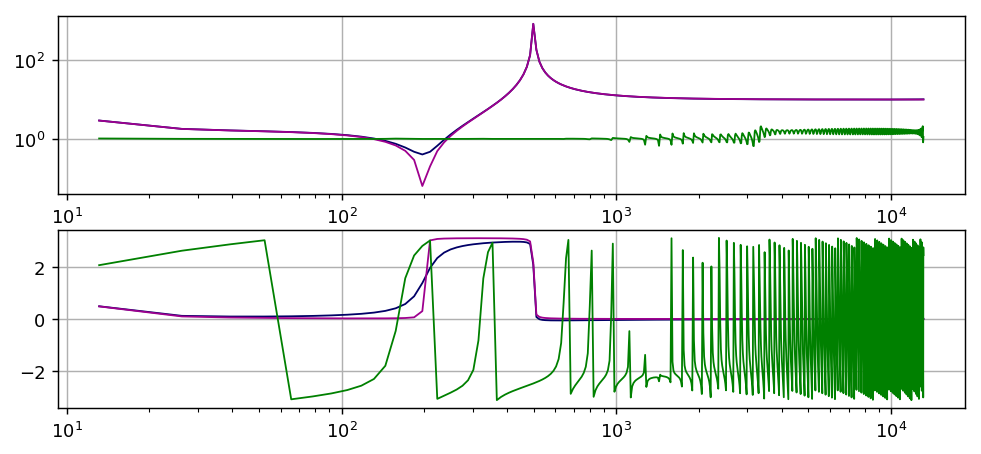

In [103]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')
w, h = scipy.signal.freqs_zpk(*ZPKs , worN = F_AC  * np.pi * 2)

F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'cont')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'cont')

w, h = scipy.signal.freqz(b_fit, a_fit, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'fit', color = 'green')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit', color = 'green')

In [714]:
a

array([  1.        ,  -5.95716765,  14.82272486, -19.71904857,
        14.79247603,  -5.93286753,   0.99388286])

In [702]:
a_fit

array([ -1.00000000 +0.00000000e+00j,   5.79248351 -1.41728436e-06j,
       -13.72722481 +7.12666564e-06j,  16.16707426 -1.31654990e-05j,
        -7.38164870 +8.23298009e-06j,  -4.67790066 +5.98485108e-06j,
         9.25685707 -1.30321029e-05j,  -6.31063518 +8.36384647e-06j,
         2.21880515 -2.29107967e-06j,  -0.33781064 +1.97622720e-07j])

In [703]:
b


array([  1.85499696e-08,  -5.55407915e-08,   3.70474780e-08,
         3.68208752e-08,  -5.53707080e-08,   1.84931732e-08])

In [704]:
b_fit

array([ -1.00608575e-09 -9.55680435e-15j,
         1.27808426e-09 +4.20518676e-14j,
         2.15761718e-09 -6.88007416e-14j,
        -4.14126259e-09 +4.96845542e-14j,   1.71163785e-09 -1.33788821e-14j])